# **1. Environment Setup & Path Verification (FD003)**

This cell initializes the execution environment for the FD003 workflow.
It sets a fixed random seed for reproducibility, configures logging, and mounts Google Drive when running in Colab.
The expected file paths for the FD003 dataset (train, test, and RUL files) are defined and verified to ensure that all required inputs are available before proceeding with data loading and preprocessing.

In [1]:
# 1. Environment Setup & Path Verification (FD003)


import os
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# simple logger
def log(msg):
    print(f"[INFO] {msg}")

# reproducibility
SEED = 42
random.seed(SEED)
np.random.seed(SEED)
log(f"Seed fixed at {SEED} for reproducibility.")

# Mount Google Drive
try:
    from google.colab import drive
    log("Mounting Google Drive...")
    drive.mount('/content/drive')
    log("Google Drive mounted successfully.")
except ImportError:
    log("Not running in Colab — skipping drive.mount().")

# FD003 Data Directory
BASE_PATH_FD003 = "/content/drive/MyDrive/OIL PREDICTIVE MAINTAINANCE/CMaps"

train_path_fd003 = os.path.join(BASE_PATH_FD003, "train_FD003.txt")
test_path_fd003  = os.path.join(BASE_PATH_FD003, "test_FD003.txt")
rul_path_fd003   = os.path.join(BASE_PATH_FD003, "RUL_FD003.txt")

log("FD003 expected file paths:")
print("   Train:", train_path_fd003)
print("   Test :", test_path_fd003)
print("   RUL  :", rul_path_fd003)

# Verify file existence
missing = []
for p in [train_path_fd003, test_path_fd003, rul_path_fd003]:
    if os.path.exists(p):
        print(f"Found: {p}")
    else:
        print(f"Missing: {p}")
        missing.append(p)

if missing:
    raise FileNotFoundError(
        " ERROR: Required FD003 files are missing:\n" +
        "\n".join(missing)
    )

log("FD003 environment ready.")

[INFO] Seed fixed at 42 for reproducibility.
[INFO] Mounting Google Drive...
Mounted at /content/drive
[INFO] Google Drive mounted successfully.
[INFO] FD003 expected file paths:
   Train: /content/drive/MyDrive/OIL PREDICTIVE MAINTAINANCE/CMaps/train_FD003.txt
   Test : /content/drive/MyDrive/OIL PREDICTIVE MAINTAINANCE/CMaps/test_FD003.txt
   RUL  : /content/drive/MyDrive/OIL PREDICTIVE MAINTAINANCE/CMaps/RUL_FD003.txt
Found: /content/drive/MyDrive/OIL PREDICTIVE MAINTAINANCE/CMaps/train_FD003.txt
Found: /content/drive/MyDrive/OIL PREDICTIVE MAINTAINANCE/CMaps/test_FD003.txt
Found: /content/drive/MyDrive/OIL PREDICTIVE MAINTAINANCE/CMaps/RUL_FD003.txt
[INFO] FD003 environment ready.


# **2. DEFINE FILE PATHS (FD003)**

This section centralizes all file path definitions for the FD003 dataset.
By assigning consistent directory variables for the train, test, and RUL files, the pipeline remains easy to maintain and portable across environments.
Clear path definitions also help ensure that subsequent data-loading steps operate on the correct CMAPSS files.


In [2]:
# 2. DEFINE FILE PATHS (FD003)

base_path = "/content/drive/MyDrive/OIL PREDICTIVE MAINTAINANCE/CMaps"

train_path_fd003 = f"{base_path}/train_FD003.txt"
test_path_fd003  = f"{base_path}/test_FD003.txt"
rul_path_fd003   = f"{base_path}/RUL_FD003.txt"

print("Paths set for FD003:")
print(train_path_fd003)
print(test_path_fd003)
print(rul_path_fd003)

Paths set for FD003:
/content/drive/MyDrive/OIL PREDICTIVE MAINTAINANCE/CMaps/train_FD003.txt
/content/drive/MyDrive/OIL PREDICTIVE MAINTAINANCE/CMaps/test_FD003.txt
/content/drive/MyDrive/OIL PREDICTIVE MAINTAINANCE/CMaps/RUL_FD003.txt


# **3. LOAD RAW FD003 DATA**

This cell loads the FD003 dataset into structured DataFrames using the official CMAPSS column schema.
The train, test, and RUL files are parsed into their respective tables, ensuring consistent formatting across all units and sensor readings.
Basic shape checks and a preview of the training data help validate that the raw files were read correctly before proceeding to preprocessing and feature engineering.

In [3]:
# 3. LOAD RAW FD003 DATA


fd003_cols = ["unit", "cycle", "setting1", "setting2", "setting3"] + [
    f"sensor{i}" for i in range(1, 22)
]

train_fd003 = pd.read_csv(train_path_fd003, sep=r"\s+", header=None, names=fd003_cols)
test_fd003  = pd.read_csv(test_path_fd003,  sep=r"\s+", header=None, names=fd003_cols)
rul_fd003   = pd.read_csv(rul_path_fd003,   sep=r"\s+", header=None)[0]

print("FD003 Train Shape:", train_fd003.shape)
print("FD003 Test Shape :", test_fd003.shape)
print("FD003 RUL Shape  :", rul_fd003.shape)

display(train_fd003.head())

FD003 Train Shape: (24720, 26)
FD003 Test Shape : (16596, 26)
FD003 RUL Shape  : (100,)


,unit,cycle,setting1,setting2,setting3,sensor1,sensor2,sensor3,sensor4,sensor5,...,sensor12,sensor13,sensor14,sensor15,sensor16,sensor17,sensor18,sensor19,sensor20,sensor21
0,1,1,-0.0005,0.0004,100.0,518.67,642.36,1583.23,1396.84,14.62,...,522.31,2388.01,8145.32,8.4246,0.03,391,2388,100.0,39.11,23.3537
1,1,2,0.0008,-0.0003,100.0,518.67,642.50,1584.69,1396.89,14.62,...,522.42,2388.03,8152.85,8.4403,0.03,392,2388,100.0,38.99,23.4491
2,1,3,-0.0014,-0.0002,100.0,518.67,642.18,1582.35,1405.61,14.62,...,522.03,2388.00,8150.17,8.3901,0.03,391,2388,100.0,38.85,23.3669
3,1,4,-0.0020,0.0001,100.0,518.67,642.92,1585.61,1392.27,14.62,...,522.49,2388.08,8146.56,8.3878,0.03,392,2388,100.0,38.96,23.2951
4,1,5,0.0016,0.0000,100.0,518.67,641.68,1588.63,1397.65,14.62,...,522.58,2388.03,8147.80,8.3869,0.03,392,2388,100.0,39.14,23.4583


# **4. DEEP DATA INTEGRITY CHECK (FD003)**

This step performs a comprehensive validation of the raw FD003 dataset to ensure its structural correctness before feature engineering.
The checks include data preview, shape inspection, datatype verification, missing-value detection, and duplicate row analysis for both train and test sets.
Engine counts are confirmed to match expected dimensions, and a sample of the test data is displayed.
These integrity checks help guarantee that the dataset is clean, consistent, and ready for downstream preprocessing.

In [4]:
# 4. DEEP DATA INTEGRITY CHECK (FD003)


print("FD003 — BASIC INFO (TRAIN)")
display(train_fd003.head())
print("\nShape (train):", train_fd003.shape)

print("\n Data types:")
print(train_fd003.dtypes)

print("\n Missing values (train):")
print(train_fd003.isna().sum())

print("\n Duplicate rows in TRAIN:", train_fd003.duplicated().sum())
print(" Duplicate rows in TEST :",  test_fd003.duplicated().sum())

print("\n ENGINE COUNTS")
print("Unique engines in TRAIN:", train_fd003["unit"].nunique())
print("Unique engines in TEST :",  test_fd003["unit"].nunique())

print("\n SAMPLE OF TEST DATA")
display(test_fd003.head())

print("\n fd003 basic checks done.")


FD003 — BASIC INFO (TRAIN)


,unit,cycle,setting1,setting2,setting3,sensor1,sensor2,sensor3,sensor4,sensor5,...,sensor12,sensor13,sensor14,sensor15,sensor16,sensor17,sensor18,sensor19,sensor20,sensor21
0,1,1,-0.0005,0.0004,100.0,518.67,642.36,1583.23,1396.84,14.62,...,522.31,2388.01,8145.32,8.4246,0.03,391,2388,100.0,39.11,23.3537
1,1,2,0.0008,-0.0003,100.0,518.67,642.50,1584.69,1396.89,14.62,...,522.42,2388.03,8152.85,8.4403,0.03,392,2388,100.0,38.99,23.4491
2,1,3,-0.0014,-0.0002,100.0,518.67,642.18,1582.35,1405.61,14.62,...,522.03,2388.00,8150.17,8.3901,0.03,391,2388,100.0,38.85,23.3669
3,1,4,-0.0020,0.0001,100.0,518.67,642.92,1585.61,1392.27,14.62,...,522.49,2388.08,8146.56,8.3878,0.03,392,2388,100.0,38.96,23.2951
4,1,5,0.0016,0.0000,100.0,518.67,641.68,1588.63,1397.65,14.62,...,522.58,2388.03,8147.80,8.3869,0.03,392,2388,100.0,39.14,23.4583



Shape (train): (24720, 26)

 Data types:
unit          int64
cycle         int64
setting1    float64
setting2    float64
setting3    float64
sensor1     float64
sensor2     float64
sensor3     float64
sensor4     float64
sensor5     float64
sensor6     float64
sensor7     float64
sensor8     float64
sensor9     float64
sensor10    float64
sensor11    float64
sensor12    float64
sensor13    float64
sensor14    float64
sensor15    float64
sensor16    float64
sensor17      int64
sensor18      int64
sensor19    float64
sensor20    float64
sensor21    float64
dtype: object

 Missing values (train):
unit        0
cycle       0
setting1    0
setting2    0
setting3    0
sensor1     0
sensor2     0
sensor3     0
sensor4     0
sensor5     0
sensor6     0
sensor7     0
sensor8     0
sensor9     0
sensor10    0
sensor11    0
sensor12    0
sensor13    0
sensor14    0
sensor15    0
sensor16    0
sensor17    0
sensor18    0
sensor19    0
sensor20    0
sensor21    0
dtype: int64

 Duplicate rows in T

,unit,cycle,setting1,setting2,setting3,sensor1,sensor2,sensor3,sensor4,sensor5,...,sensor12,sensor13,sensor14,sensor15,sensor16,sensor17,sensor18,sensor19,sensor20,sensor21
0,1,1,-0.0017,-0.0004,100.0,518.67,641.94,1581.93,1396.93,14.62,...,521.89,2387.94,8133.48,8.3760,0.03,391,2388,100.0,39.07,23.4468
1,1,2,0.0006,-0.0002,100.0,518.67,642.02,1584.86,1398.90,14.62,...,521.85,2388.01,8137.44,8.4062,0.03,391,2388,100.0,39.04,23.4807
2,1,3,0.0014,-0.0003,100.0,518.67,641.68,1581.78,1391.92,14.62,...,522.10,2387.94,8138.25,8.3553,0.03,391,2388,100.0,39.10,23.4244
3,1,4,0.0027,0.0001,100.0,518.67,642.20,1584.53,1395.34,14.62,...,522.45,2387.96,8137.07,8.3709,0.03,392,2388,100.0,38.97,23.4782
4,1,5,-0.0001,0.0001,100.0,518.67,642.46,1589.03,1395.86,14.62,...,521.91,2387.97,8134.20,8.4146,0.03,391,2388,100.0,39.09,23.3950



 fd003 basic checks done.


# **5. PER-ENGINE CYCLE STATS & VISUALIZATION (FD003)**

This cell analyzes the lifecycle lengths of each engine in the FD003 training set.
By computing the maximum cycle count per engine and visualizing the distribution, we gain insights into how long engines operate before failure and whether any units exhibit unusually short or long runtimes.
These statistics help guide sequence-length decisions and ensure that subsequent temporal modeling aligns well with the dataset’s operational characteristics.

FD003 — PER-ENGINE CYCLE STATS (TRAIN) 


,cycle
count,100.00000
mean,247.20000
std,86.48384
min,145.00000
25%,189.75000
50%,220.50000
75%,279.75000
max,525.00000


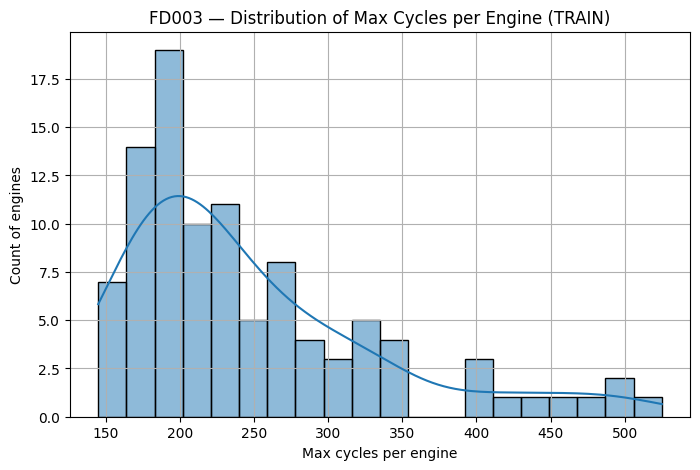


Min cycles: 145
Max cycles: 525
Engines with very short runs (<=50 cycles): 0


In [5]:
# 5. PER-ENGINE CYCLE STATS & VISUALIZATION (FD003)

print("FD003 — PER-ENGINE CYCLE STATS (TRAIN) ")

cycles_per_engine_fd003 = train_fd003.groupby("unit")["cycle"].max()
display(cycles_per_engine_fd003.describe())

plt.figure(figsize=(8,5))
sns.histplot(cycles_per_engine_fd003, bins=20, kde=True)
plt.title("FD003 — Distribution of Max Cycles per Engine (TRAIN)")
plt.xlabel("Max cycles per engine")
plt.ylabel("Count of engines")
plt.grid(True)
plt.show()

print("\nMin cycles:", cycles_per_engine_fd003.min())
print("Max cycles:", cycles_per_engine_fd003.max())
print("Engines with very short runs (<=50 cycles):",
      (cycles_per_engine_fd003 <= 50).sum())

# **6. SETTINGS DISTRIBUTION & VISUAL CHECKS (FD003)**

This step examines the three operational settings in the FD003 dataset to ensure they behave within expected numerical ranges.
Descriptive statistics and distribution plots help verify that the settings contain no missing values, anomalies, or abnormal spikes.
Validating these inputs is important because operating conditions can strongly influence sensor behavior and engine degradation patterns, impacting the effectiveness of sequence models.

FD003 — SETTINGS SUMMARY (TRAIN)


,setting1,setting2,setting3
count,24720.000000,24720.000000,24720.0
mean,-0.000024,0.000005,100.0
std,0.002194,0.000294,0.0
min,-0.008600,-0.000600,100.0
25%,-0.001500,-0.000200,100.0
50%,-0.000000,-0.000000,100.0
75%,0.001500,0.000300,100.0
max,0.008600,0.000700,100.0


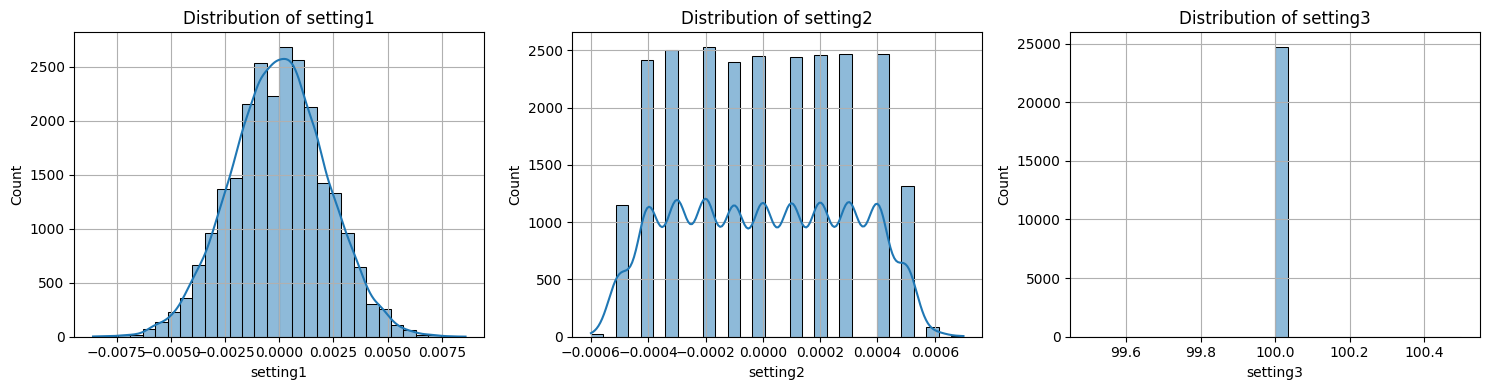


 Settings look numerically sensible (no NaNs, no crazy out-of-range spikes).


In [6]:
# 6. SETTINGS DISTRIBUTION & VISUAL CHECKS (FD003)


setting_cols = ["setting1", "setting2", "setting3"]

print("FD003 — SETTINGS SUMMARY (TRAIN)")
display(train_fd003[setting_cols].describe())

fig, axes = plt.subplots(1, 3, figsize=(15,4))
for i, col in enumerate(setting_cols):
    sns.histplot(train_fd003[col], bins=30, kde=True, ax=axes[i])
    axes[i].set_title(f"Distribution of {col}")
    axes[i].grid(True)
plt.tight_layout()
plt.show()

print("\n Settings look numerically sensible (no NaNs, no crazy out-of-range spikes).")

# **7. SENSOR STATS, NEAR-CONSTANT DETECTION & CORRELATION (FD003)**

This cell performs a detailed diagnostic of the FD003 sensor signals to evaluate their usefulness for predictive modeling.
It summarizes distribution statistics, identifies sensors with extremely low variance (indicating no meaningful information), and visualizes correlations among a subset of sensors.
These checks help ensure the model is trained on informative, non-redundant features and provide early insight into which sensors contribute strongly to engine degradation patterns.

 FD003 sensor summary (first 15):


,count,mean,std,min,25%,50%,75%,max
sensor1,24720.0,518.670000,6.684921e-11,518.6700,518.6700,518.6700,518.6700,518.6700
sensor2,24720.0,642.457858,5.230311e-01,640.8400,642.0800,642.4000,642.7900,645.1100
sensor3,24720.0,1588.079175,6.810418e+00,1564.3000,1583.2800,1587.5200,1592.4125,1615.3900
sensor4,24720.0,1404.471212,9.773178e+00,1377.0600,1397.1875,1402.9100,1410.6000,1441.1600
sensor5,24720.0,14.620000,3.602525e-12,14.6200,14.6200,14.6200,14.6200,14.6200
sensor6,24720.0,21.595841,1.811600e-02,21.4500,21.5800,21.6000,21.6100,21.6100
sensor7,24720.0,555.143808,3.437343e+00,549.6100,553.1100,554.0500,556.0400,570.4900
sensor8,24720.0,2388.071555,1.582849e-01,2386.9000,2388.0000,2388.0700,2388.1400,2388.6000
sensor9,24720.0,9064.110809,1.998029e+01,9017.9800,9051.9200,9060.0100,9070.0925,9234.3500
sensor10,24720.0,1.301232,3.484849e-03,1.2900,1.3000,1.3000,1.3000,1.3200



 Sensor standard deviations (first 15):


,0
sensor1,6.684921e-11
sensor2,5.230311e-01
sensor3,6.810418e+00
sensor4,9.773178e+00
sensor5,3.602525e-12
sensor6,1.811600e-02
sensor7,3.437343e+00
sensor8,1.582849e-01
sensor9,1.998029e+01
sensor10,3.484849e-03



 Near-constant sensor columns in FD003 (std < 1e-06):
['sensor1', 'sensor5', 'sensor16', 'sensor18', 'sensor19']


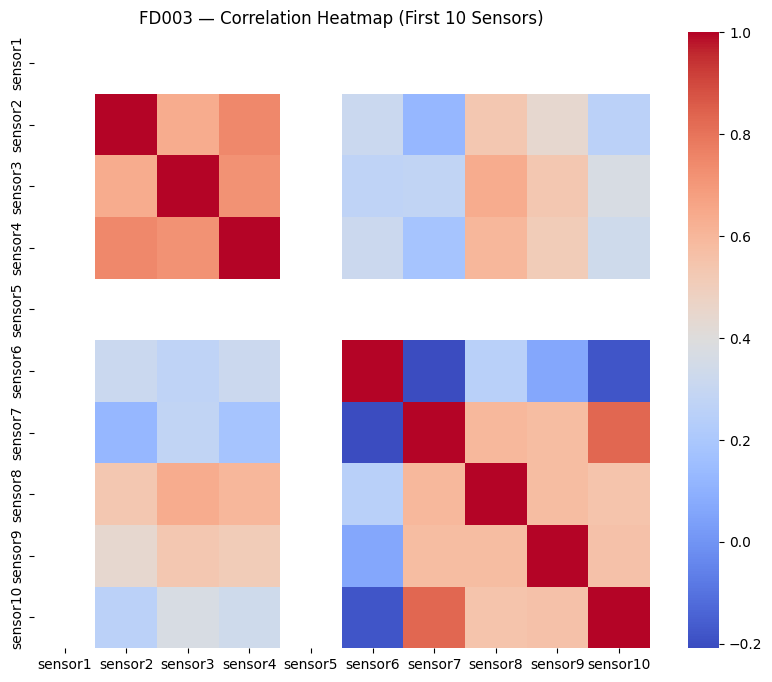


 Sensor stats, near-constant detection & correlation heatmap complete.


In [7]:
# 7. SENSOR STATS, NEAR-CONSTANT DETECTION & CORRELATION (FD003)


sensor_cols = [c for c in train_fd003.columns if c.startswith("sensor")]

print(" FD003 sensor summary (first 15):")
display(train_fd003[sensor_cols].describe().T.head(15))

sensor_std_fd003 = train_fd003[sensor_cols].std()

print("\n Sensor standard deviations (first 15):")
display(sensor_std_fd003.head(15))

STD_THRESHOLD = 1e-6
constant_cols_fd003 = sensor_std_fd003[sensor_std_fd003 < STD_THRESHOLD].index.tolist()

print(f"\n Near-constant sensor columns in FD003 (std < {STD_THRESHOLD}):")
print(constant_cols_fd003)

subset_sensors = sensor_cols[:10]
plt.figure(figsize=(10, 8))
corr = train_fd003[subset_sensors].corr()
sns.heatmap(corr, annot=False, cmap="coolwarm", square=True)
plt.title("FD003 — Correlation Heatmap (First 10 Sensors)")
plt.show()

print("\n Sensor stats, near-constant detection & correlation heatmap complete.")

# **8. DROP NEAR-CONSTANT SENSORS (FD003)**

This step removes sensor channels that exhibit negligible variability across the dataset.
Near-constant features provide no predictive value to sequence models and may introduce noise or unnecessary dimensionality.
By eliminating these sensors from both the training and test sets, we streamline the feature space, reduce computation, and improve the overall quality of the input data used for RUL prediction.

In [8]:
# 8. DROP NEAR-CONSTANT SENSORS (FD003)


print("Dropping near-constant sensor columns (FD003):", constant_cols_fd003)

train_fd003.drop(columns=constant_cols_fd003, inplace=True)
test_fd003.drop(columns=constant_cols_fd003, inplace=True)

sensor_cols = [c for c in train_fd003.columns if c.startswith("sensor")]

print("\nAfter dropping near-constant sensors:")
print("Train shape:", train_fd003.shape)
print("Test  shape:", test_fd003.shape)
print("Remaining sensors:", len(sensor_cols))
print(sensor_cols)

Dropping near-constant sensor columns (FD003): ['sensor1', 'sensor5', 'sensor16', 'sensor18', 'sensor19']

After dropping near-constant sensors:
Train shape: (24720, 21)
Test  shape: (16596, 21)
Remaining sensors: 16
['sensor2', 'sensor3', 'sensor4', 'sensor6', 'sensor7', 'sensor8', 'sensor9', 'sensor10', 'sensor11', 'sensor12', 'sensor13', 'sensor14', 'sensor15', 'sensor17', 'sensor20', 'sensor21']


# **9. Generate RUL Targets for Training Data (FD003)**

This cell computes the Remaining Useful Life (RUL) for each engine in the FD003 training set.
For every unit, the maximum cycle is identified and used to derive its RUL at each timestamp as the difference between the final cycle and the current cycle.
Descriptive statistics and distribution plots help validate the target variable, while a final sanity check confirms that the last cycle of every engine correctly receives an RUL of zero.
This target construction step is essential for supervised RUL prediction.

 Sample RUL values (FD003)


,unit,cycle,max_cycle,RUL
0,1,1,259,258
1,1,2,259,257
2,1,3,259,256
3,1,4,259,255
4,1,5,259,254
5,1,6,259,253
6,1,7,259,252
7,1,8,259,251
8,1,9,259,250
9,1,10,259,249



RUL descriptive stats (before capping) — FD003:


,RUL
count,24720.000000
mean,138.077063
std,98.846675
min,0.000000
25%,61.000000
50%,123.000000
75%,190.000000
max,524.000000


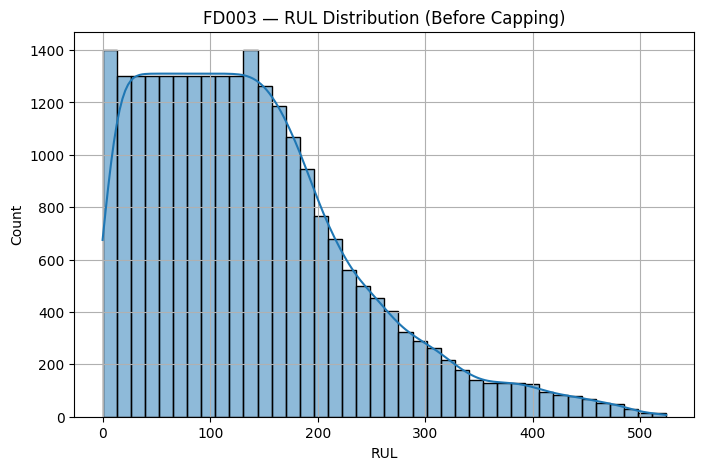


Sanity check — RUL at last cycle should be 0 (FD003):


,unit,cycle,max_cycle,RUL
258,1,259,259,0
511,2,253,253,0
733,3,222,222,0
1005,4,272,272,0
1218,5,213,213,0


Unique RUL at last cycles: [0]


In [9]:
# 9. GENERATE RUL FOR TRAINING DATA (FD003)


max_cycle_per_unit_fd003 = train_fd003.groupby("unit")["cycle"].max()
train_fd003["max_cycle"] = train_fd003["unit"].map(max_cycle_per_unit_fd003)
train_fd003["RUL"] = train_fd003["max_cycle"] - train_fd003["cycle"]

print(" Sample RUL values (FD003)")
display(train_fd003[["unit", "cycle", "max_cycle", "RUL"]].head(10))

print("\nRUL descriptive stats (before capping) — FD003:")
display(train_fd003["RUL"].describe())

plt.figure(figsize=(8,5))
sns.histplot(train_fd003["RUL"], bins=40, kde=True)
plt.title("FD003 — RUL Distribution (Before Capping)")
plt.xlabel("RUL")
plt.ylabel("Count")
plt.grid(True)
plt.show()

check_last_fd003 = train_fd003.groupby("unit").tail(1)
print("\nSanity check — RUL at last cycle should be 0 (FD003):")
display(check_last_fd003[["unit", "cycle", "max_cycle", "RUL"]].head())
print("Unique RUL at last cycles:", check_last_fd003["RUL"].unique()[:10])

# **10. Apply RUL Cap and Visualize Distribution (FD003)**

This step enforces a maximum Remaining Useful Life (RUL) cap of 125 cycles, a common practice in CMAPSS modeling to reduce the influence of extremely long survival times and stabilize training.
The capped RUL values are summarized and visualized to verify the effect of the constraint.
This helps ensure that the target distribution aligns with practical operating ranges and improves model robustness during supervised learning.

 Applied RUL cap of 125 (FD003).
RUL summary after capping:


,RUL
count,24720.000000
mean,93.143204
std,40.627125
min,0.000000
25%,61.000000
50%,123.000000
75%,125.000000
max,125.000000


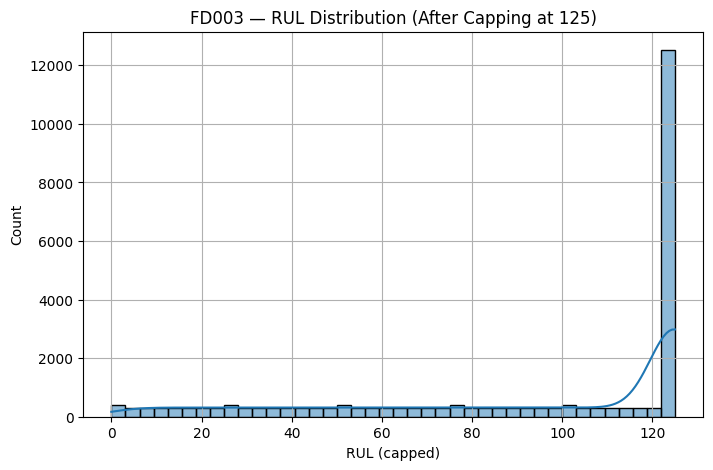

In [10]:
# 10. APPLY RUL CAP (125) & VISUALIZE (FD003)


RUL_CAP_FD003 = 125
train_fd003["RUL"] = np.minimum(train_fd003["RUL"], RUL_CAP_FD003)

print(" Applied RUL cap of 125 (FD003).")
print("RUL summary after capping:")
display(train_fd003["RUL"].describe())

plt.figure(figsize=(8,5))
sns.histplot(train_fd003["RUL"], bins=40, kde=True)
plt.title("FD003 — RUL Distribution (After Capping at 125)")
plt.xlabel("RUL (capped)")
plt.ylabel("Count")
plt.grid(True)
plt.show()

# **11. Train/Validation Split, Feature Selection, and Scaler Setup (FD003)**

This cell prepares the FD003 dataset for model training by performing an engine-wise split into training and validation sets, ensuring no temporal leakage across units.
Non-feature columns are excluded to define the final input feature set, and a MinMaxScaler is fitted on the training features to normalize all inputs consistently.
This preprocessing ensures that both training and validation data share the same scaling parameters, which is critical for stable learning in sequence-based neural models.

In [11]:
# 11. TRAIN/VAL SPLIT + FEATURE COLUMNS & SCALER (FD003)


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

engine_ids_fd003 = train_fd003["unit"].unique()
train_ids_fd003, val_ids_fd003 = train_test_split(
    engine_ids_fd003,
    test_size=0.2,
    random_state=42,
)

train_df_fd003 = train_fd003[train_fd003["unit"].isin(train_ids_fd003)].reset_index(drop=True)
val_df_fd003   = train_fd003[train_fd003["unit"].isin(val_ids_fd003)].reset_index(drop=True)

print("Train engines (FD003):", len(train_ids_fd003))
print("Val engines   (FD003):", len(val_ids_fd003))
print("Train shape   (FD003):", train_df_fd003.shape)
print("Val shape     (FD003):", val_df_fd003.shape)

exclude_cols_fd003 = ["unit", "cycle", "max_cycle", "RUL"]
feature_cols_fd003 = [c for c in train_df_fd003.columns if c not in exclude_cols_fd003]

print("\n Number of feature columns (FD003):", len(feature_cols_fd003))
print(feature_cols_fd003)

scaler_fd003 = MinMaxScaler()
scaler_fd003.fit(train_df_fd003[feature_cols_fd003])

print("\n Scaler fitted on FD003 training feature columns.")

Train engines (FD003): 80
Val engines   (FD003): 20
Train shape   (FD003): (20012, 23)
Val shape     (FD003): (4708, 23)

 Number of feature columns (FD003): 19
['setting1', 'setting2', 'setting3', 'sensor2', 'sensor3', 'sensor4', 'sensor6', 'sensor7', 'sensor8', 'sensor9', 'sensor10', 'sensor11', 'sensor12', 'sensor13', 'sensor14', 'sensor15', 'sensor17', 'sensor20', 'sensor21']

 Scaler fitted on FD003 training feature columns.


# **12. Feature Engineering: Rolling Statistics and Delta Signals (FD003)**

This step enhances the raw sensor data by adding short-term and long-term rolling statistics, along with first-order deltas for each sensor signal.
Rolling means and standard deviations capture local trends and variability, while delta features highlight abrupt changes in behavior—both of which are crucial for modeling degradation dynamics in sequence models.
The engineered features are generated consistently across the train, validation, and test sets, ensuring a uniform feature space for downstream normalization and sequence construction.

In [12]:
# 12. FEATURE ENGINEERING (ROLLING & DELTA) — FD003


log("Starting feature engineering for FD003 (rolling + delta)...")

def add_rolling_and_delta_features_fd003(df, sensor_cols, win_short=3, win_long=5):
    df = df.sort_values(["unit", "cycle"]).copy()

    for sensor in sensor_cols:
        grp = df.groupby("unit")[sensor]

        df[f"{sensor}_roll{win_short}_mean"] = (
            grp.rolling(win_short, min_periods=1).mean().reset_index(0, drop=True)
        )
        df[f"{sensor}_roll{win_short}_std"] = (
            grp.rolling(win_short, min_periods=1).std().reset_index(0, drop=True)
        )
        df[f"{sensor}_roll{win_long}_mean"] = (
            grp.rolling(win_long, min_periods=1).mean().reset_index(0, drop=True)
        )
        df[f"{sensor}_roll{win_long}_std"] = (
            grp.rolling(win_long, min_periods=1).std().reset_index(0, drop=True)
        )

        df[f"{sensor}_delta"] = grp.diff().fillna(0).values

    df = df.fillna(0.0)
    return df

train_fd003_fe = add_rolling_and_delta_features_fd003(train_df_fd003, sensor_cols)
val_fd003_fe   = add_rolling_and_delta_features_fd003(val_df_fd003,   sensor_cols)
test_fd003_fe  = add_rolling_and_delta_features_fd003(test_fd003,     sensor_cols)

log(f"Feature engineering done (FD003). Shapes:")
print("  Train FE:", train_fd003_fe.shape)
print("  Val   FE:", val_fd003_fe.shape)
print("  Test  FE:", test_fd003_fe.shape)

print("\nSample engineered columns (FD003):")
print([c for c in train_fd003_fe.columns if "roll" in c or "delta" in c][:20])

[INFO] Starting feature engineering for FD003 (rolling + delta)...
[INFO] Feature engineering done (FD003). Shapes:
  Train FE: (20012, 103)
  Val   FE: (4708, 103)
  Test  FE: (16596, 101)

Sample engineered columns (FD003):
['sensor2_roll3_mean', 'sensor2_roll3_std', 'sensor2_roll5_mean', 'sensor2_roll5_std', 'sensor2_delta', 'sensor3_roll3_mean', 'sensor3_roll3_std', 'sensor3_roll5_mean', 'sensor3_roll5_std', 'sensor3_delta', 'sensor4_roll3_mean', 'sensor4_roll3_std', 'sensor4_roll5_mean', 'sensor4_roll5_std', 'sensor4_delta', 'sensor6_roll3_mean', 'sensor6_roll3_std', 'sensor6_roll5_mean', 'sensor6_roll5_std', 'sensor6_delta']


# **13. Final Feature Matrix Construction and Scaling (FD003)**

This step consolidates all engineered features—rolling statistics, deltas, and raw sensor values—into the final input matrix used for sequence modeling.
Non-feature columns are excluded, and a MinMaxScaler is fitted on the engineered training data to ensure consistent normalization across train, validation, and test splits.
This standardized feature matrix serves as the foundation for building temporal sequences and training deep learning models on FD003.

In [13]:
# 13. FINAL FEATURE MATRIX & SCALING — FD003


log("Preparing final feature matrices and scaling (FD003)...")

exclude_cols_fd003 = ["unit", "cycle", "max_cycle", "RUL"]

feature_cols_final_fd003 = [
    c for c in train_fd003_fe.columns
    if c not in exclude_cols_fd003
]

print(" Number of FINAL feature columns (FD003):", len(feature_cols_final_fd003))
print(feature_cols_final_fd003[:25])

scaler_fd003 = MinMaxScaler()
X_train_fd003_scaled = scaler_fd003.fit_transform(train_fd003_fe[feature_cols_final_fd003])
X_val_fd003_scaled   = scaler_fd003.transform(val_fd003_fe[feature_cols_final_fd003])
X_test_fd003_scaled  = scaler_fd003.transform(test_fd003_fe[feature_cols_final_fd003])

log("Scaling complete (FD003).")
print("Scaled shapes (FD003):")
print("  X_train_fd003_scaled:", X_train_fd003_scaled.shape)
print("  X_val_fd003_scaled  :", X_val_fd003_scaled.shape)
print("  X_test_fd003_scaled :", X_test_fd003_scaled.shape)

[INFO] Preparing final feature matrices and scaling (FD003)...
 Number of FINAL feature columns (FD003): 99
['setting1', 'setting2', 'setting3', 'sensor2', 'sensor3', 'sensor4', 'sensor6', 'sensor7', 'sensor8', 'sensor9', 'sensor10', 'sensor11', 'sensor12', 'sensor13', 'sensor14', 'sensor15', 'sensor17', 'sensor20', 'sensor21', 'sensor2_roll3_mean', 'sensor2_roll3_std', 'sensor2_roll5_mean', 'sensor2_roll5_std', 'sensor2_delta', 'sensor3_roll3_mean']
[INFO] Scaling complete (FD003).
Scaled shapes (FD003):
  X_train_fd003_scaled: (20012, 99)
  X_val_fd003_scaled  : (4708, 99)
  X_test_fd003_scaled : (16596, 99)


# **14. CLASSICAL BASELINE MODELS (RF & XGB) — FD003**

This cell establishes strong classical machine learning baselines for FD003 using Random Forest and XGBoost regressors.
The engineered and scaled feature matrices are used to train both models, and their performance is evaluated on the validation set using RMSE and MAE.
These baselines provide a crucial reference point for assessing whether deep learning sequence models deliver meaningful performance improvements over traditional tabular approaches.

In [14]:
# 14. CLASSICAL BASELINE MODELS (RF & XGB) — FD003


from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

log("Training CLASSICAL BASELINE MODELS (RF & XGB) for FD003...")

X_train_base_fd003 = X_train_fd003_scaled
X_val_base_fd003   = X_val_fd003_scaled

y_train_base_fd003 = train_fd003_fe["RUL"].values
y_val_base_fd003   = val_fd003_fe["RUL"].values

print("Baseline X_train shape (FD003):", X_train_base_fd003.shape)
print("Baseline X_val   shape (FD003):", X_val_base_fd003.shape)
print("Baseline y_train shape (FD003):", y_train_base_fd003.shape)
print("Baseline y_val   shape (FD003):", y_val_base_fd003.shape)

rf_fd003 = RandomForestRegressor(
    n_estimators=300,
    max_depth=None,
    n_jobs=-1,
    random_state=SEED,
    min_samples_split=4,
    min_samples_leaf=2,
)

log("Fitting RandomForest baseline for FD003...")
rf_fd003.fit(X_train_base_fd003, y_train_base_fd003)

y_val_pred_rf_fd003 = rf_fd003.predict(X_val_base_fd003)

rmse_rf_fd003 = np.sqrt(mean_squared_error(y_val_base_fd003, y_val_pred_rf_fd003))
mae_rf_fd003  = mean_absolute_error(y_val_base_fd003, y_val_pred_rf_fd003)

print("\n FD003 RANDOM FOREST BASELINE — VALIDATION PERFORMANCE ")
print(f"RMSE (val): {rmse_rf_fd003:.4f}")
print(f"MAE  (val): {mae_rf_fd003:.4f}")

try:
    from xgboost import XGBRegressor

    xgb_fd003 = XGBRegressor(
        n_estimators=400,
        max_depth=6,
        learning_rate=0.05,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=SEED,
        tree_method="hist",
    )

    log("Fitting XGBoost baseline for FD003...")
    xgb_fd003.fit(X_train_base_fd003, y_train_base_fd003)

    y_val_pred_xgb_fd003 = xgb_fd003.predict(X_val_base_fd003)

    rmse_xgb_fd003 = np.sqrt(mean_squared_error(y_val_base_fd003, y_val_pred_xgb_fd003))
    mae_xgb_fd003  = mean_absolute_error(y_val_base_fd003, y_val_pred_xgb_fd003)

    print("\n FD003 XGBOOST BASELINE — VALIDATION PERFORMANCE ")
    print(f"RMSE (val): {rmse_xgb_fd003:.4f}")
    print(f"MAE  (val): {mae_xgb_fd003:.4f}")

except ImportError:
    log("xgboost is not installed — skipping XGBoost baseline for FD003.")
    rmse_xgb_fd003 = None
    mae_xgb_fd003  = None

log("FD003 classical baselines (RF/XGB) training complete.")

[INFO] Training CLASSICAL BASELINE MODELS (RF & XGB) for FD003...
Baseline X_train shape (FD003): (20012, 99)
Baseline X_val   shape (FD003): (4708, 99)
Baseline y_train shape (FD003): (20012,)
Baseline y_val   shape (FD003): (4708,)
[INFO] Fitting RandomForest baseline for FD003...

 FD003 RANDOM FOREST BASELINE — VALIDATION PERFORMANCE 
RMSE (val): 15.7856
MAE  (val): 10.6383
[INFO] Fitting XGBoost baseline for FD003...

 FD003 XGBOOST BASELINE — VALIDATION PERFORMANCE 
RMSE (val): 15.7095
MAE  (val): 10.5845
[INFO] FD003 classical baselines (RF/XGB) training complete.


# **15. Sequence Builder Function for Temporal Modeling (FD003)**

This cell defines the core utility for constructing fixed-length temporal sequences required by LSTM, GRU, and hybrid deep learning models.
Each engine’s time-ordered sensor readings are transformed into overlapping windows of length 30, with the corresponding RUL label aligned to the final timestep of each sequence.
By converting the tabular data into structured time-series segments, this function prepares the FD003 dataset for effective sequence learning and degradation pattern modeling.

In [15]:
# 15. SEQUENCE BUILDER FUNCTION (FD003)


SEQ_LEN_FD003 = 30
log(f"FD003 sequence length set to {SEQ_LEN_FD003}.")

def build_sequences_fd003(X_scaled, df_base, seq_len):
    X_seq, y_seq = [], []

    for unit_id in df_base["unit"].unique():
        mask = df_base["unit"] == unit_id
        X_unit = X_scaled[mask]
        y_unit = df_base.loc[mask, "RUL"].values

        if len(X_unit) < seq_len:
            continue

        for i in range(len(X_unit) - seq_len + 1):
            X_seq.append(X_unit[i : i + seq_len])
            y_seq.append(y_unit[i + seq_len - 1])

    return np.array(X_seq), np.array(y_seq)

[INFO] FD003 sequence length set to 30.


# **16. Build Training and Validation Sequences (FD003)**

This step applies the sequence builder to transform the scaled feature matrices into fixed-length temporal windows used for deep learning.
Both training and validation sets are converted into sequences of length 30, with each sequence paired to the correct RUL target.
These structured time-series inputs form the foundation for training LSTM/GRU-based predictive maintenance models on FD003.

In [16]:
# 16. BUILD TRAIN & VALIDATION SEQUENCES (FD003)

log("Building TRAIN and VALIDATION sequences for FD003...")

X_train_seq_fd003, y_train_seq_fd003 = build_sequences_fd003(
    X_train_fd003_scaled,
    train_fd003_fe,
    SEQ_LEN_FD003,
)

X_val_seq_fd003, y_val_seq_fd003 = build_sequences_fd003(
    X_val_fd003_scaled,
    val_fd003_fe,
    SEQ_LEN_FD003,
)

print("X_train_seq_fd003 shape:", X_train_seq_fd003.shape)
print("y_train_seq_fd003 shape:", y_train_seq_fd003.shape)
print("X_val_seq_fd003   shape:", X_val_seq_fd003.shape)
print("y_val_seq_fd003   shape:", y_val_seq_fd003.shape)

log("Sequence construction (train/val) complete for FD003.")

[INFO] Building TRAIN and VALIDATION sequences for FD003...
X_train_seq_fd003 shape: (17692, 30, 99)
y_train_seq_fd003 shape: (17692,)
X_val_seq_fd003   shape: (4128, 30, 99)
y_val_seq_fd003   shape: (4128,)
[INFO] Sequence construction (train/val) complete for FD003.


# **17. BUILD TEST LAST-WINDOW SEQUENCES (FD003)**

This cell prepares the FD003 test set for evaluation by extracting the final sequence window from each engine’s operational history.
Only the last seq_len timesteps are used, mirroring real deployment scenarios where the model receives the most recent sensor readings to predict the remaining useful life.
The true RUL labels are mapped from the provided RUL vector, ensuring proper alignment across units.
These last-window sequences enable accurate and realistic test-set evaluation of the trained deep learning models.

In [17]:
# 17. BUILD TEST LAST-WINDOW SEQUENCES (FD003)

log("Building TEST last-window sequences for FD003...")

def build_test_last_window_sequences_fd003(X_scaled, df_base, rul_vector, seq_len):
    X_seq = []
    y_true = []

    for unit_id in sorted(df_base["unit"].unique()):
        mask = df_base["unit"] == unit_id
        X_unit = X_scaled[mask]

        if len(X_unit) < seq_len:
            continue

        seq = X_unit[-seq_len:]
        X_seq.append(seq)

        true_rul = rul_vector.iloc[unit_id - 1]
        y_true.append(true_rul)

    return np.array(X_seq), np.array(y_true)

X_test_last_seq_fd003, y_test_last_true_fd003 = build_test_last_window_sequences_fd003(
    X_test_fd003_scaled,
    test_fd003_fe,
    rul_fd003,
    SEQ_LEN_FD003,
)

print("X_test_last_seq_fd003 shape:", X_test_last_seq_fd003.shape)
print("y_test_last_true_fd003 shape:", y_test_last_true_fd003.shape)

log("FD003 TEST last-window sequence building complete.")

[INFO] Building TEST last-window sequences for FD003...
X_test_last_seq_fd003 shape: (100, 30, 99)
y_test_last_true_fd003 shape: (100,)
[INFO] FD003 TEST last-window sequence building complete.


# **18. SANITY CHECK FOR NaN VALUES (FD003)**

This step performs a final integrity check to ensure that no missing values are present in the scaled feature matrices or RUL targets across the training, validation, and test datasets.
Detecting NaNs at this stage is critical, as sequence models cannot handle incomplete numerical inputs and will fail silently or produce unstable training behavior.
A clean pass here confirms that preprocessing, feature engineering, and sequence construction were all executed correctly, allowing the model training phase to proceed safely.

In [18]:
# 18. SANITY CHECK FOR NaN VALUES (FD003)


log("Checking for NaN values in FD003 features and targets...")

nan_train_features_fd003 = np.isnan(X_train_fd003_scaled).sum()
nan_val_features_fd003   = np.isnan(X_val_fd003_scaled).sum()
nan_test_features_fd003  = np.isnan(X_test_last_seq_fd003).sum()

nan_y_train_fd003 = np.isnan(y_train_seq_fd003).sum()
nan_y_val_fd003   = np.isnan(y_val_seq_fd003).sum()
nan_y_test_fd003  = np.isnan(y_test_last_true_fd003).sum()

print("\n FEATURE NaN CHECK (FD003) ")
print(f"Train features NaN count : {nan_train_features_fd003}")
print(f"Val   features NaN count : {nan_val_features_fd003}")
print(f"Test  features NaN count : {nan_test_features_fd003}")

print("\n TARGET NaN CHECK (FD003) ")
print(f"Train RUL NaN count : {nan_y_train_fd003}")
print(f"Val   RUL NaN count : {nan_y_val_fd003}")
print(f"Test  RUL NaN count : {nan_y_test_fd003}")

if (
    nan_train_features_fd003 == 0 and
    nan_val_features_fd003 == 0 and
    nan_test_features_fd003 == 0 and
    nan_y_train_fd003 == 0 and
    nan_y_val_fd003 == 0 and
    nan_y_test_fd003 == 0
):
    print("\n NO NaN VALUES FOUND (FD003) ")
else:
    print("\n WARNING: NaN values detected in FD003! FIX BEFORE TRAINING.")

[INFO] Checking for NaN values in FD003 features and targets...

 FEATURE NaN CHECK (FD003) 
Train features NaN count : 0
Val   features NaN count : 0
Test  features NaN count : 0

 TARGET NaN CHECK (FD003) 
Train RUL NaN count : 0
Val   RUL NaN count : 0
Test  RUL NaN count : 0

 NO NaN VALUES FOUND (FD003) 


# **19. Normalize RUL Targets for Sequence Modeling (FD003)**

This step scales the RUL targets into a normalized range using MinMaxScaler, ensuring they are numerically compatible with deep learning sequence models.
Normalizing the target stabilizes training, prevents large-gradient instability, and aligns the RUL values with the scale of the model outputs.
Both training and validation RUL sequences are transformed using the same scaler, preserving consistency during model evaluation.

In [19]:
# 19. NORMALIZE RUL TARGETS FOR SEQ MODELING (FD003)


from sklearn.preprocessing import MinMaxScaler as MMS_FD003

log("Normalizing RUL targets for FD003 sequence models...")

rul_scaler_fd003 = MMS_FD003()

y_train_seq_fd003_scaled = rul_scaler_fd003.fit_transform(
    y_train_seq_fd003.reshape(-1, 1)
)
y_val_seq_fd003_scaled = rul_scaler_fd003.transform(
    y_val_seq_fd003.reshape(-1, 1)
)

print(" RUL scaling complete (FD003).")
print("Sample original vs scaled (first 5 FD003):")
for orig, scaled in zip(y_train_seq_fd003[:5], y_train_seq_fd003_scaled[:5]):
    print(f"RUL {orig:6.1f}  ->  {scaled[0]:.6f}")

[INFO] Normalizing RUL targets for FD003 sequence models...
 RUL scaling complete (FD003).
Sample original vs scaled (first 5 FD003):
RUL  125.0  ->  1.000000
RUL  125.0  ->  1.000000
RUL  125.0  ->  1.000000
RUL  125.0  ->  1.000000
RUL  125.0  ->  1.000000


# **20. Baseline LSTM Model Training and Validation (FD003)**

This cell trains a baseline LSTM model to establish a deep learning benchmark for the FD003 dataset.
A simple architecture—single LSTM layer with dropout and linear output—is used to capture temporal degradation patterns.
The model is trained on normalized RUL targets with early stopping to prevent overfitting, and predictions are inverse-scaled for evaluation.
Validation RMSE and MAE provide a reference point for comparing more advanced or hybrid architectures in later stages of the pipeline.

In [20]:
# CELL 20. BASELINE LSTM (FD003)


import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

log("Training BASELINE LSTM model for FD003...")

n_timesteps_fd003 = X_train_seq_fd003.shape[1]
n_features_fd003  = X_train_seq_fd003.shape[2]

def build_lstm_baseline_fd003(seq_len, n_features):
    model = Sequential()
    model.add(
        LSTM(
            64,
            return_sequences=False,
            input_shape=(seq_len, n_features),
        )
    )
    model.add(Dropout(0.2))
    model.add(Dense(1, activation="linear"))

    model.compile(
        loss="mse",
        optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
    )
    return model

model_lstm_base_fd003 = build_lstm_baseline_fd003(n_timesteps_fd003, n_features_fd003)
model_lstm_base_fd003.summary()

early_stop_lstm_base_fd003 = EarlyStopping(
    monitor="val_loss",
    patience=3,
    restore_best_weights=True,
    verbose=1,
)

history_lstm_base_fd003 = model_lstm_base_fd003.fit(
    X_train_seq_fd003,
    y_train_seq_fd003_scaled,
    validation_data=(X_val_seq_fd003, y_val_seq_fd003_scaled),
    epochs=20,
    batch_size=128,
    callbacks=[early_stop_lstm_base_fd003],
    verbose=2,
)

val_pred_lstm_base_fd003_scaled = model_lstm_base_fd003.predict(X_val_seq_fd003).ravel()
val_pred_lstm_base_fd003 = rul_scaler_fd003.inverse_transform(
    val_pred_lstm_base_fd003_scaled.reshape(-1, 1)
).ravel()

rmse_lstm_base_fd003 = np.sqrt(mean_squared_error(y_val_seq_fd003, val_pred_lstm_base_fd003))
mae_lstm_base_fd003  = mean_absolute_error(y_val_seq_fd003, val_pred_lstm_base_fd003)

print("\n FD003 BASELINE LSTM — VALIDATION PERFORMANCE ")
print(f"RMSE (val): {rmse_lstm_base_fd003:.4f}")
print(f"MAE  (val): {mae_lstm_base_fd003:.4f}")

[INFO] Training BASELINE LSTM model for FD003...


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 64)             │        41,984 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 42,049 (164.25 KB)

 Trainable params: 42,049 (164.25 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
139/139 - 10s - 70ms/step - loss: 0.0536 - val_loss: 0.0212
Epoch 2/20
139/139 - 6s - 40ms/step - loss: 0.0269 - val_loss: 0.0190
Epoch 3/20
139/139 - 7s - 54ms/step - loss: 0.0242 - val_loss: 0.0179
Epoch 4/20
139/139 - 6s - 41ms/step - loss: 0.0229 - val_loss: 0.0181
Epoch 5/20
139/139 - 8s - 58ms/step - loss: 0.0207 - val_loss: 0.0177
Epoch 6/20
139/139 - 6s - 41ms/step - loss: 0.0196 - val_loss: 0.0179
Epoch 7/20
139/139 - 8s - 56ms/step - loss: 0.0170 - val_loss: 0.0179
Epoch 8/20
139/139 - 6s - 41ms/step - loss: 0.0166 - val_loss: 0.0155
Epoch 9/20
139/139 - 11s - 81ms/step - loss: 0.0148 - val_loss: 0.0145
Epoch 10/20
139/139 - 6s - 41ms/step - loss: 0.0144 - val_loss: 0.0134
Epoch 11/20
139/139 - 7s - 54ms/step - loss: 0.0139 - val_loss: 0.0127
Epoch 12/20
139/139 - 6s - 40ms/step - loss: 0.0129 - val_loss: 0.0132
Epoch 13/20
139/139 - 10s - 74ms/step - loss: 0.0124 - val_loss: 0.0147
Epoch 14/20
139/139 - 7s - 53ms/step - loss: 0.0122 - val_loss: 0.0125
Epoch 15/20


# **21. Baseline GRU Model Training and Validation (FD003)**

This cell trains a baseline GRU model as an alternative deep learning benchmark to the LSTM architecture.
GRUs provide a lighter, faster recurrent structure while still capturing essential temporal dependencies in engine degradation sequences.
The model is trained on normalized RUL targets with early stopping, and predictions are inverse-scaled for evaluation.
Validation RMSE and MAE allow direct comparison with both classical baselines and the LSTM model, helping assess whether GRUs offer performance or stability advantages for FD003.

In [21]:
# 21. BASELINE GRU (FD003)


from tensorflow.keras.layers import GRU

log("Training BASELINE GRU model for FD003...")

def build_gru_baseline_fd003(seq_len, n_features):
    model = Sequential()
    model.add(
        GRU(
            64,
            return_sequences=False,
            input_shape=(seq_len, n_features),
        )
    )
    model.add(Dropout(0.2))
    model.add(Dense(1, activation="linear"))

    model.compile(
        loss="mse",
        optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
    )
    return model

model_gru_base_fd003 = build_gru_baseline_fd003(n_timesteps_fd003, n_features_fd003)
model_gru_base_fd003.summary()

early_stop_gru_base_fd003 = EarlyStopping(
    monitor="val_loss",
    patience=3,
    restore_best_weights=True,
    verbose=1,
)

history_gru_base_fd003 = model_gru_base_fd003.fit(
    X_train_seq_fd003,
    y_train_seq_fd003_scaled,
    validation_data=(X_val_seq_fd003, y_val_seq_fd003_scaled),
    epochs=20,
    batch_size=128,
    callbacks=[early_stop_gru_base_fd003],
    verbose=2,
)

val_pred_gru_base_fd003_scaled = model_gru_base_fd003.predict(X_val_seq_fd003).ravel()
val_pred_gru_base_fd003 = rul_scaler_fd003.inverse_transform(
    val_pred_gru_base_fd003_scaled.reshape(-1, 1)
).ravel()

rmse_gru_base_fd003 = np.sqrt(mean_squared_error(y_val_seq_fd003, val_pred_gru_base_fd003))
mae_gru_base_fd003  = mean_absolute_error(y_val_seq_fd003, val_pred_gru_base_fd003)

print("\n FD003 BASELINE GRU — VALIDATION PERFORMANCE ")
print(f"RMSE (val): {rmse_gru_base_fd003:.4f}")
print(f"MAE  (val): {mae_gru_base_fd003:.4f}")


[INFO] Training BASELINE GRU model for FD003...


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru (GRU)                       │ (None, 64)             │        31,680 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31,745 (124.00 KB)

 Trainable params: 31,745 (124.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
139/139 - 12s - 85ms/step - loss: 0.0603 - val_loss: 0.0238
Epoch 2/20
139/139 - 8s - 59ms/step - loss: 0.0290 - val_loss: 0.0220
Epoch 3/20
139/139 - 9s - 62ms/step - loss: 0.0274 - val_loss: 0.0220
Epoch 4/20
139/139 - 10s - 68ms/step - loss: 0.0256 - val_loss: 0.0208
Epoch 5/20
139/139 - 7s - 51ms/step - loss: 0.0247 - val_loss: 0.0186
Epoch 6/20
139/139 - 12s - 84ms/step - loss: 0.0216 - val_loss: 0.0165
Epoch 7/20
139/139 - 6s - 47ms/step - loss: 0.0181 - val_loss: 0.0147
Epoch 8/20
139/139 - 10s - 74ms/step - loss: 0.0161 - val_loss: 0.0189
Epoch 9/20
139/139 - 8s - 61ms/step - loss: 0.0152 - val_loss: 0.0134
Epoch 10/20
139/139 - 7s - 47ms/step - loss: 0.0143 - val_loss: 0.0123
Epoch 11/20
139/139 - 10s - 73ms/step - loss: 0.0135 - val_loss: 0.0114
Epoch 12/20
139/139 - 12s - 84ms/step - loss: 0.0136 - val_loss: 0.0116
Epoch 13/20
139/139 - 17s - 119ms/step - loss: 0.0129 - val_loss: 0.0124
Epoch 14/20
139/139 - 16s - 113ms/step - loss: 0.0121 - val_loss: 0.0131
Epoch

# **22. Tuned LSTM Model Training and Validation (FD003)**

This cell trains an enhanced LSTM architecture designed to capture deeper temporal dependencies in the FD003 dataset.
The tuned model uses stacked LSTM layers, higher hidden dimensions, and heavier dropout to improve generalization and sequence sensitivity.
Training is performed with extended epochs and early stopping, allowing the model to learn richer degradation patterns while avoiding overfitting.
Validation RMSE and MAE are computed after inverse-scaling predictions, enabling direct comparison with baseline models and assessing the benefit of the tuned architecture.

In [22]:
# 22. TUNED LSTM (FD003)


log("Training TUNED LSTM model for FD003...")

def build_lstm_tuned_fd003(seq_len, n_features):
    model = Sequential()
    model.add(
        LSTM(
            128,
            return_sequences=True,
            input_shape=(seq_len, n_features),
        )
    )
    model.add(Dropout(0.3))
    model.add(
        LSTM(
            64,
            return_sequences=False,
        )
    )
    model.add(Dropout(0.3))
    model.add(Dense(32, activation="relu"))
    model.add(Dense(1, activation="linear"))

    model.compile(
        loss="mse",
        optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
    )
    return model

model_lstm_tuned_fd003 = build_lstm_tuned_fd003(n_timesteps_fd003, n_features_fd003)
model_lstm_tuned_fd003.summary()

early_stop_lstm_tuned_fd003 = EarlyStopping(
    monitor="val_loss",
    patience=5,
    restore_best_weights=True,
    verbose=1,
)

history_lstm_tuned_fd003 = model_lstm_tuned_fd003.fit(
    X_train_seq_fd003,
    y_train_seq_fd003_scaled,
    validation_data=(X_val_seq_fd003, y_val_seq_fd003_scaled),
    epochs=40,
    batch_size=128,
    callbacks=[early_stop_lstm_tuned_fd003],
    verbose=2,
)

val_pred_lstm_tuned_fd003_scaled = model_lstm_tuned_fd003.predict(X_val_seq_fd003).ravel()
val_pred_lstm_tuned_fd003 = rul_scaler_fd003.inverse_transform(
    val_pred_lstm_tuned_fd003_scaled.reshape(-1, 1)
).ravel()

rmse_lstm_tuned_fd003 = np.sqrt(mean_squared_error(y_val_seq_fd003, val_pred_lstm_tuned_fd003))
mae_lstm_tuned_fd003  = mean_absolute_error(y_val_seq_fd003, val_pred_lstm_tuned_fd003)

print("\n FD003 TUNED LSTM — VALIDATION PERFORMANCE ")
print(f"RMSE (val): {rmse_lstm_tuned_fd003:.4f}")
print(f"MAE  (val): {mae_lstm_tuned_fd003:.4f}")


[INFO] Training TUNED LSTM model for FD003...


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                   │ (None, 30, 128)        │       116,736 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 30, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 168,257 (657.25 KB)

 Trainable params: 168,257 (657.25 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/40
139/139 - 27s - 192ms/step - loss: 0.0562 - val_loss: 0.0231
Epoch 2/40
139/139 - 20s - 146ms/step - loss: 0.0274 - val_loss: 0.0185
Epoch 3/40
139/139 - 22s - 158ms/step - loss: 0.0227 - val_loss: 0.0282
Epoch 4/40
139/139 - 20s - 146ms/step - loss: 0.0186 - val_loss: 0.0151
Epoch 5/40
139/139 - 23s - 162ms/step - loss: 0.0169 - val_loss: 0.0217
Epoch 6/40
139/139 - 21s - 152ms/step - loss: 0.0156 - val_loss: 0.0145
Epoch 7/40
139/139 - 22s - 160ms/step - loss: 0.0145 - val_loss: 0.0158
Epoch 8/40
139/139 - 41s - 294ms/step - loss: 0.0128 - val_loss: 0.0186
Epoch 9/40
139/139 - 20s - 147ms/step - loss: 0.0123 - val_loss: 0.0171
Epoch 10/40
139/139 - 22s - 160ms/step - loss: 0.0114 - val_loss: 0.0163
Epoch 11/40
139/139 - 43s - 308ms/step - loss: 0.0106 - val_loss: 0.0123
Epoch 12/40
139/139 - 22s - 162ms/step - loss: 0.0102 - val_loss: 0.0138
Epoch 13/40
139/139 - 21s - 154ms/step - loss: 0.0100 - val_loss: 0.0160
Epoch 14/40
139/139 - 40s - 287ms/step - loss: 0.0096 - val_

# **23. Tuned GRU Model Training and Validation (FD003)**

This cell trains an advanced GRU-based architecture with stacked recurrent layers, expanded hidden dimensions, and increased dropout for improved robustness.
The tuned GRU aims to capture complex degradation dynamics in FD003 while remaining computationally efficient compared to deep LSTM stacks.
Early stopping ensures stable convergence, and predictions are inverse-transformed to compute RMSE and MAE on the validation set.
These metrics provide a clear benchmark for assessing the GRU model’s effectiveness relative to both baseline and tuned LSTM models.

In [23]:
# 23. TUNED GRU (FD003)


log("Training TUNED GRU model for FD003...")

def build_gru_tuned_fd003(seq_len, n_features):
    model = Sequential()
    model.add(
        GRU(
            128,
            return_sequences=True,
            input_shape=(seq_len, n_features),
        )
    )
    model.add(Dropout(0.3))
    model.add(
        GRU(
            64,
            return_sequences=False,
        )
    )
    model.add(Dropout(0.3))
    model.add(Dense(32, activation="relu"))
    model.add(Dense(1, activation="linear"))

    model.compile(
        loss="mse",
        optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
    )
    return model

model_gru_tuned_fd003 = build_gru_tuned_fd003(n_timesteps_fd003, n_features_fd003)
model_gru_tuned_fd003.summary()

early_stop_gru_tuned_fd003 = EarlyStopping(
    monitor="val_loss",
    patience=5,
    restore_best_weights=True,
    verbose=1,
)

history_gru_tuned_fd003 = model_gru_tuned_fd003.fit(
    X_train_seq_fd003,
    y_train_seq_fd003_scaled,
    validation_data=(X_val_seq_fd003, y_val_seq_fd003_scaled),
    epochs=40,
    batch_size=128,
    callbacks=[early_stop_gru_tuned_fd003],
    verbose=2,
)

val_pred_gru_tuned_fd003_scaled = model_gru_tuned_fd003.predict(X_val_seq_fd003).ravel()
val_pred_gru_tuned_fd003 = rul_scaler_fd003.inverse_transform(
    val_pred_gru_tuned_fd003_scaled.reshape(-1, 1)
).ravel()

rmse_gru_tuned_fd003 = np.sqrt(mean_squared_error(y_val_seq_fd003, val_pred_gru_tuned_fd003))
mae_gru_tuned_fd003  = mean_absolute_error(y_val_seq_fd003, val_pred_gru_tuned_fd003)

print("\n FD003 TUNED GRU — VALIDATION PERFORMANCE ")
print(f"RMSE (val): {rmse_gru_tuned_fd003:.4f}")
print(f"MAE  (val): {mae_gru_tuned_fd003:.4f}")



[INFO] Training TUNED GRU model for FD003...


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru_1 (GRU)                     │ (None, 30, 128)        │        87,936 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 30, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_2 (GRU)                     │ (None, 64)             │        37,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 127,297 (497.25 KB)

 Trainable params: 127,297 (497.25 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/40
139/139 - 28s - 203ms/step - loss: 0.0502 - val_loss: 0.0207
Epoch 2/40
139/139 - 21s - 151ms/step - loss: 0.0286 - val_loss: 0.0190
Epoch 3/40
139/139 - 41s - 297ms/step - loss: 0.0250 - val_loss: 0.0205
Epoch 4/40
139/139 - 23s - 164ms/step - loss: 0.0215 - val_loss: 0.0157
Epoch 5/40
139/139 - 23s - 164ms/step - loss: 0.0184 - val_loss: 0.0177
Epoch 6/40
139/139 - 43s - 311ms/step - loss: 0.0159 - val_loss: 0.0122
Epoch 7/40
139/139 - 21s - 153ms/step - loss: 0.0137 - val_loss: 0.0138
Epoch 8/40
139/139 - 23s - 168ms/step - loss: 0.0125 - val_loss: 0.0126
Epoch 9/40
139/139 - 22s - 160ms/step - loss: 0.0114 - val_loss: 0.0132
Epoch 10/40
139/139 - 22s - 159ms/step - loss: 0.0107 - val_loss: 0.0120
Epoch 11/40
139/139 - 23s - 167ms/step - loss: 0.0098 - val_loss: 0.0123
Epoch 12/40
139/139 - 23s - 164ms/step - loss: 0.0099 - val_loss: 0.0110
Epoch 13/40
139/139 - 23s - 166ms/step - loss: 0.0089 - val_loss: 0.0130
Epoch 14/40
139/139 - 23s - 162ms/step - loss: 0.0087 - val_

# **24. Hybrid LSTM–GRU Model Training and Validation (FD003)**

This cell trains a hybrid deep learning architecture that combines the strengths of both LSTM and GRU layers.
The stacked LSTM layer captures long-range temporal dependencies, while the GRU layer efficiently models shorter-term dynamics, offering a balanced and expressive sequence model for FD003.
Additional dense layers and dropout improve generalization, and early stopping helps stabilize training.
Validation RMSE and MAE are computed after inverse-transforming predictions, enabling direct comparison with baseline, tuned, and hybrid architectures to identify the most effective model for FD003.

In [24]:
# 24. HYBRID LSTM–GRU (FD003)


log("Training HYBRID LSTM–GRU model for FD003...")

def build_hybrid_lstm_gru_fd003(seq_len, n_features):
    model = Sequential()
    model.add(
        LSTM(
            128,
            return_sequences=True,
            input_shape=(seq_len, n_features),
        )
    )
    model.add(Dropout(0.3))
    model.add(
        GRU(
            64,
            return_sequences=False,
        )
    )
    model.add(Dropout(0.3))
    model.add(Dense(64, activation="relu"))
    model.add(Dense(1, activation="linear"))

    model.compile(
        loss="mse",
        optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
    )
    return model

model_hybrid_fd003 = build_hybrid_lstm_gru_fd003(n_timesteps_fd003, n_features_fd003)
model_hybrid_fd003.summary()

early_stop_hybrid_fd003 = EarlyStopping(
    monitor="val_loss",
    patience=5,
    restore_best_weights=True,
    verbose=1,
)

history_hybrid_fd003 = model_hybrid_fd003.fit(
    X_train_seq_fd003,
    y_train_seq_fd003_scaled,
    validation_data=(X_val_seq_fd003, y_val_seq_fd003_scaled),
    epochs=40,
    batch_size=128,
    callbacks=[early_stop_hybrid_fd003],
    verbose=2,
)

val_pred_hybrid_fd003_scaled = model_hybrid_fd003.predict(X_val_seq_fd003).ravel()
val_pred_hybrid_fd003 = rul_scaler_fd003.inverse_transform(
    val_pred_hybrid_fd003_scaled.reshape(-1, 1)
).ravel()

rmse_hybrid_fd003 = np.sqrt(mean_squared_error(y_val_seq_fd003, val_pred_hybrid_fd003))
mae_hybrid_fd003  = mean_absolute_error(y_val_seq_fd003, val_pred_hybrid_fd003)

print("\n FD003 HYBRID LSTM–GRU — VALIDATION PERFORMANCE ")
print(f"RMSE (val): {rmse_hybrid_fd003:.4f}")
print(f"MAE  (val): {mae_hybrid_fd003:.4f}")

[INFO] Training HYBRID LSTM–GRU model for FD003...


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_3 (LSTM)                   │ (None, 30, 128)        │       116,736 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 30, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_3 (GRU)                     │ (None, 64)             │        37,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 158,209 (618.00 KB)

 Trainable params: 158,209 (618.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/40
139/139 - 26s - 187ms/step - loss: 0.0542 - val_loss: 0.0239
Epoch 2/40
139/139 - 22s - 161ms/step - loss: 0.0270 - val_loss: 0.0195
Epoch 3/40
139/139 - 22s - 160ms/step - loss: 0.0241 - val_loss: 0.0205
Epoch 4/40
139/139 - 21s - 152ms/step - loss: 0.0213 - val_loss: 0.0167
Epoch 5/40
139/139 - 23s - 162ms/step - loss: 0.0173 - val_loss: 0.0187
Epoch 6/40
139/139 - 22s - 158ms/step - loss: 0.0156 - val_loss: 0.0156
Epoch 7/40
139/139 - 22s - 159ms/step - loss: 0.0140 - val_loss: 0.0145
Epoch 8/40
139/139 - 23s - 167ms/step - loss: 0.0130 - val_loss: 0.0161
Epoch 9/40
139/139 - 21s - 149ms/step - loss: 0.0122 - val_loss: 0.0165
Epoch 10/40
139/139 - 23s - 164ms/step - loss: 0.0106 - val_loss: 0.0143
Epoch 11/40
139/139 - 22s - 160ms/step - loss: 0.0108 - val_loss: 0.0141
Epoch 12/40
139/139 - 23s - 166ms/step - loss: 0.0098 - val_loss: 0.0123
Epoch 13/40
139/139 - 22s - 162ms/step - loss: 0.0095 - val_loss: 0.0116
Epoch 14/40
139/139 - 22s - 159ms/step - loss: 0.0112 - val_

# **25. FD003 Model Leaderboard: Baseline vs Deep Learning Models**

This cell compiles the performance of all trained models—classical baselines and deep learning architectures—into a unified leaderboard using validation RMSE and MAE.
The results from Random Forest, XGBoost, LSTM, GRU, tuned variants, and the hybrid LSTM–GRU model are aggregated and ranked to identify the best-performing architecture for FD003.
This leaderboard provides a clear comparison of modeling approaches and guides the selection of the optimal model for NASA scoring and final deployment.

In [25]:
# 25.  FD003 MODEL LEADERBOARD (BASELINE + DEEP)


log("Building FD003 model leaderboard (baseline models + deep models, validation metrics)...")

results_fd003 = {}

# Classical baselines
try:
    results_fd003["RF_BASE"] = {
        "RMSE_val": rmse_rf_fd003,
        "MAE_val":  mae_rf_fd003,
    }
except NameError:
    pass

try:
    if rmse_xgb_fd003 is not None:
        results_fd003["XGB_BASE"] = {
            "RMSE_val": rmse_xgb_fd003,
            "MAE_val":  mae_xgb_fd003,
        }
except NameError:
    pass

# Deep models
try:
    results_fd003["LSTM_BASE"] = {
        "RMSE_val": rmse_lstm_base_fd003,
        "MAE_val":  mae_lstm_base_fd003,
    }
except NameError:
    pass

try:
    results_fd003["GRU_BASE"] = {
        "RMSE_val": rmse_gru_base_fd003,
        "MAE_val":  mae_gru_base_fd003,
    }
except NameError:
    pass

try:
    results_fd003["LSTM_TUNED"] = {
        "RMSE_val": rmse_lstm_tuned_fd003,
        "MAE_val":  mae_lstm_tuned_fd003,
    }
except NameError:
    pass

try:
    results_fd003["GRU_TUNED"] = {
        "RMSE_val": rmse_gru_tuned_fd003,
        "MAE_val":  mae_gru_tuned_fd003,
    }
except NameError:
    pass

try:
    results_fd003["HYBRID_LSTM_GRU"] = {
        "RMSE_val": rmse_hybrid_fd003,
        "MAE_val":  mae_hybrid_fd003,
    }
except NameError:
    pass

if not results_fd003:
    raise RuntimeError(" No FD003 deep model metrics found. Run Cells 20–24 first.")

df_fd003_leaderboard = (
    pd.DataFrame(results_fd003)
    .T
    .sort_values("RMSE_val")
)

print("\n FD003 DEEP MODEL LEADERBOARD (Validation) ")
display(df_fd003_leaderboard)

best_model_name_fd003 = df_fd003_leaderboard.index[0]
print(f"\n Best FD003 deep model by validation RMSE: {best_model_name_fd003}")

[INFO] Building FD003 model leaderboard (baseline models + deep models, validation metrics)...

 FD003 DEEP MODEL LEADERBOARD (Validation) 


,RMSE_val,MAE_val
GRU_TUNED,12.691144,9.322998
LSTM_BASE,12.776186,9.080970
HYBRID_LSTM_GRU,12.788041,8.192844
GRU_BASE,13.351380,9.690979
LSTM_TUNED,13.886511,11.130082
XGB_BASE,15.709534,10.584534
RF_BASE,15.785631,10.638335



 Best FD003 deep model by validation RMSE: GRU_TUNED


# **26. Select and Save the Best FD003 Model and Associated Scalers**

This step finalizes the model selection process by retrieving the best-performing FD003 deep learning architecture from the leaderboard and saving it for downstream evaluation and deployment.
Both the feature scaler and the RUL target scaler used during preprocessing are also persisted to ensure consistency between training, validation, and inference pipelines.
Storing these artifacts guarantees full reproducibility and enables seamless integration into later phases such as NASA scoring, FastAPI serving, or unified pipeline deployment.

In [26]:
# 26. PICK & SAVE BEST FD003 MODEL + SCALERS


import joblib

log("Selecting and saving best FD003 model + scalers...")

def get_best_model_fd003(name: str):
    if name == "LSTM_BASE":
        return model_lstm_base_fd003
    elif name == "GRU_BASE":
        return model_gru_base_fd003
    elif name == "LSTM_TUNED":
        return model_lstm_tuned_fd003
    elif name == "GRU_TUNED":
        return model_gru_tuned_fd003
    elif name == "HYBRID_LSTM_GRU":
        return model_hybrid_fd003
    else:
        raise ValueError(f"Unknown best model name for FD003: {name}")

best_model_fd003 = get_best_model_fd003(best_model_name_fd003)
print(f" Best FD003 model selected: {best_model_name_fd003}")

models_dir_fd003 = os.path.join(BASE_PATH_FD003, "models_fd003")
os.makedirs(models_dir_fd003, exist_ok=True)
print(f"Models directory (FD003): {models_dir_fd003}")

model_filename_fd003 = f"FD003_{best_model_name_fd003}_BEST.keras"
model_path_fd003 = os.path.join(models_dir_fd003, model_filename_fd003)

best_model_fd003.save(model_path_fd003)
print(f" Saved best FD003 model to:\n{model_path_fd003}")

scaler_fd003_path = os.path.join(models_dir_fd003, "FD003_feature_scaler_fd003.pkl")
rul_scaler_fd003_path = os.path.join(models_dir_fd003, "FD003_rul_scaler_fd003.pkl")

joblib.dump(scaler_fd003, scaler_fd003_path)
joblib.dump(rul_scaler_fd003, rul_scaler_fd003_path)

print(f" Saved FD003 feature scaler to: {scaler_fd003_path}")
print(f" Saved FD003 RUL scaler to    : {rul_scaler_fd003_path}")

log("Best FD003 model + scalers saved successfully.")

[INFO] Selecting and saving best FD003 model + scalers...
 Best FD003 model selected: GRU_TUNED
Models directory (FD003): /content/drive/MyDrive/OIL PREDICTIVE MAINTAINANCE/CMaps/models_fd003
 Saved best FD003 model to:
/content/drive/MyDrive/OIL PREDICTIVE MAINTAINANCE/CMaps/models_fd003/FD003_GRU_TUNED_BEST.keras
 Saved FD003 feature scaler to: /content/drive/MyDrive/OIL PREDICTIVE MAINTAINANCE/CMaps/models_fd003/FD003_feature_scaler_fd003.pkl
 Saved FD003 RUL scaler to    : /content/drive/MyDrive/OIL PREDICTIVE MAINTAINANCE/CMaps/models_fd003/FD003_rul_scaler_fd003.pkl
[INFO] Best FD003 model + scalers saved successfully.


# **27. NASA Asymmetric Scoring Function (FD003)**

This cell defines the official NASA asymmetric scoring metric used for evaluating Remaining Useful Life predictions in the CMAPSS benchmark.
The metric penalizes late predictions (overestimation of RUL) more severely than early predictions, reflecting real-world safety and maintenance priorities.
By implementing this function, the pipeline can compute both total and mean NASA scores, enabling standardized comparison with published research and ensuring the model aligns with domain-specific evaluation requirements.

In [27]:
# 27. NASA ASYMMETRIC SCORE FUNCTION (FD003)


def nasa_asymmetric_score(y_true, y_pred):
    y_true = np.array(y_true, dtype=float)
    y_pred = np.array(y_pred, dtype=float)

    e = y_pred - y_true

    score = np.zeros_like(e, dtype=float)

    mask_under = e < 0
    score[mask_under] = np.exp(-e[mask_under] / 13.0) - 1.0

    mask_over = e >= 0
    score[mask_over] = np.exp(e[mask_over] / 10.0) - 1.0

    return score.sum(), score.mean()

# **28. NASA-Aware Calibration on Validation Set (FD003)**

This step calibrates the selected FD003 model’s predictions specifically for the NASA asymmetric scoring metric.
By sweeping across a range of shift values and RUL caps, the calibration process identifies the combination that minimizes the mean NASA score on the validation set.
The resulting optimal shift and maximum RUL cap correct systematic prediction biases and ensure that the model performs optimally under the domain-specific penalty structure.
These calibrated parameters are later reused for computing the final NASA score on the FD003 test set.

In [28]:
# 28.  NASA-AWARE CALIBRATION ON VALIDATION (FD003)


log("Calibrating FD003 best model for NASA metric on VALIDATION set...")

val_pred_best_fd003_scaled = best_model_fd003.predict(X_val_seq_fd003).ravel()

val_pred_best_fd003 = rul_scaler_fd003.inverse_transform(
    val_pred_best_fd003_scaled.reshape(-1, 1)
).ravel()

shifts_fd003 = np.arange(-30, 31, 1)
max_rul_candidates_fd003 = [110, 120, 125, 130]

def clip_rul_fd003(x, max_rul):
    return np.clip(x, 0.0, max_rul)

best_mean_nasa_fd003 = np.inf
BEST_NASA_SHIFT_FD003 = 0.0
MAX_RUL_NASA_FD003 = 125.0

for cap in max_rul_candidates_fd003:
    for s in shifts_fd003:
        y_calib_fd003 = clip_rul_fd003(val_pred_best_fd003 - s, max_rul=cap)
        _, mean_score_fd003 = nasa_asymmetric_score(y_val_seq_fd003, y_calib_fd003)
        if mean_score_fd003 < best_mean_nasa_fd003:
            best_mean_nasa_fd003 = mean_score_fd003
            BEST_NASA_SHIFT_FD003 = float(s)
            MAX_RUL_NASA_FD003 = float(cap)

print("\n FD003 NASA CALIBRATION RESULTS (VALIDATION) ")
print(f"Best mean NASA score (val): {best_mean_nasa_fd003:.4f}")
print(f"Best shift (cycles)       : {BEST_NASA_SHIFT_FD003}")
print(f"Best max RUL cap          : {MAX_RUL_NASA_FD003}")
print("\n Calibration complete — will reuse these for TEST NASA scoring (FD003).")

[INFO] Calibrating FD003 best model for NASA metric on VALIDATION set...
129/129 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step

 FD003 NASA CALIBRATION RESULTS (VALIDATION) 
Best mean NASA score (val): 2.7733
Best shift (cycles)       : 2.0
Best max RUL cap          : 125.0

 Calibration complete — will reuse these for TEST NASA scoring (FD003).


# **29. FD003 Test Predictions and NASA Scoring**

This step evaluates the best FD003 model on the test set using both raw predictions and calibrated outputs.
The model’s scaled predictions are inverse-transformed into real RUL units, after which the NASA asymmetric score is computed to measure prediction quality under domain-specific penalty rules.
Calibration parameters derived from the validation set—shift and maximum RUL cap—are then applied to obtain improved, bias-corrected predictions.
Comparing raw and calibrated NASA scores provides insight into model behavior and highlights the impact of calibration on final test performance.

In [29]:
# 29. FD003 TEST PREDICTIONS + NASA SCORE

log("Checking FD003 TEST predictions and NASA scores...")

y_test_pred_fd003_scaled = best_model_fd003.predict(X_test_last_seq_fd003).ravel()

y_test_pred_fd003_real = rul_scaler_fd003.inverse_transform(
    y_test_pred_fd003_scaled.reshape(-1, 1)
).ravel()

sum_nasa_raw_fd003, mean_nasa_raw_fd003 = nasa_asymmetric_score(
    y_test_last_true_fd003,
    y_test_pred_fd003_real,
)

print("\n FD003 NASA SCORE (TEST, RAW PREDICTIONS) ")
print(f"Total NASA score (raw) : {sum_nasa_raw_fd003:.4f}")
print(f"Mean NASA score  (raw) : {mean_nasa_raw_fd003:.4f}")

try:
    _ = BEST_NASA_SHIFT_FD003
    _ = MAX_RUL_NASA_FD003
except NameError:
    print("\n Calibration vars not found — using default shift=0, cap=125 (FD003).")
    BEST_NASA_SHIFT_FD003 = 0.0
    MAX_RUL_NASA_FD003 = 125.0

y_test_pred_fd003_calibrated = clip_rul_fd003(
    y_test_pred_fd003_real - BEST_NASA_SHIFT_FD003,
    max_rul=MAX_RUL_NASA_FD003,
)

sum_nasa_cal_fd003, mean_nasa_cal_fd003 = nasa_asymmetric_score(
    y_test_last_true_fd003,
    y_test_pred_fd003_calibrated,
)

print("\n FD003 NASA SCORE (TEST, CALIBRATED) ")
print(f"Total NASA score (calibrated) : {sum_nasa_cal_fd003:.4f}")
print(f"Mean NASA score  (calibrated) : {mean_nasa_cal_fd003:.4f}")

log("FD003 NASA scoring on TEST completed.")



[INFO] Checking FD003 TEST predictions and NASA scores...
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step

 FD003 NASA SCORE (TEST, RAW PREDICTIONS) 
Total NASA score (raw) : 323.4198
Mean NASA score  (raw) : 3.2342

 FD003 NASA SCORE (TEST, CALIBRATED) 
Total NASA score (calibrated) : 317.9155
Mean NASA score  (calibrated) : 3.1792
[INFO] FD003 NASA scoring on TEST completed.


# **30. FD003 Test RUL Prediction Table (Final Output)**

This cell compiles the final Remaining Useful Life predictions for the FD003 test set using the selected best model.
Both raw and calibrated RUL estimates are included alongside ground-truth values, allowing clear comparison of model performance across engines.
The resulting output table serves as the primary evaluation artifact for reporting, visualization, and downstream analysis.

In [30]:
# 30. FD003 TEST RUL PREDICTION (Final Output Table)


log(" FD003 TEST RUL Prediction (Using Best Model) ")

df_fd003_test_out = pd.DataFrame({
    "unit": np.arange(1, len(y_test_last_true_fd003) + 1),
    "True_RUL": y_test_last_true_fd003,
    "Predicted_RUL_RAW": y_test_pred_fd003_real,
    "Predicted_RUL_CALIBRATED": y_test_pred_fd003_calibrated
})

print("\n SAMPLE FD003 TEST PREDICTIONS ")
display(df_fd003_test_out.head(20))

log("FD003 test prediction table created.")

[INFO]  FD003 TEST RUL Prediction (Using Best Model) 

 SAMPLE FD003 TEST PREDICTIONS 


,unit,True_RUL,Predicted_RUL_RAW,Predicted_RUL_CALIBRATED
0,1,44,49.047321,47.047321
1,2,51,75.107628,73.107628
2,3,27,23.875971,21.875971
3,4,120,115.175827,113.175827
4,5,101,118.176056,116.176056
5,6,99,105.781311,103.781311
6,7,71,52.181736,50.181736
7,8,55,65.723900,63.723900
8,9,55,78.775772,76.775772
9,10,66,73.088509,71.088509


[INFO] FD003 test prediction table created.


# **31. FD003 Test Visualization and Error Analysis**

This step provides a comprehensive visual and statistical evaluation of the model’s performance on the FD003 test set.
Scatter plots compare true vs. predicted RUL values, revealing overall prediction alignment and systematic bias trends.
Error distributions and error-versus-RUL plots help diagnose under- or over-estimation behaviors across different degradation stages.
A ranked error table highlights the worst-performing engines, enabling targeted investigation of failure cases and model limitations.
These diagnostics are essential for understanding real-world reliability and guiding further model refinement.

[INFO]  FD003 TEST — VISUALIZATION & ERROR ANALYSIS 


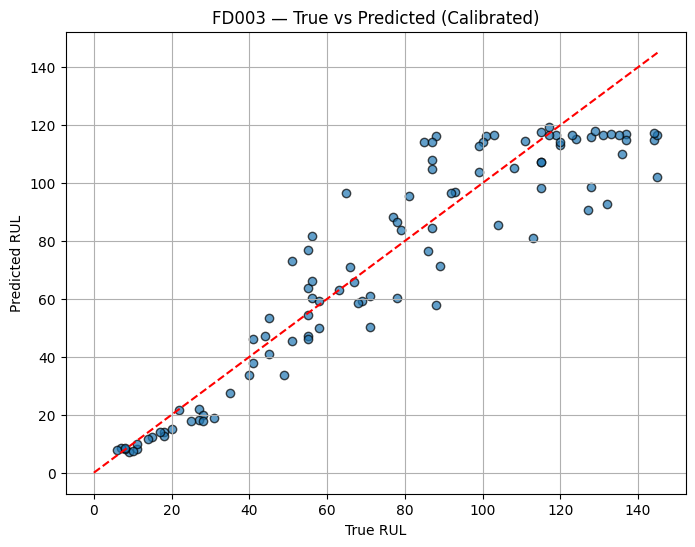

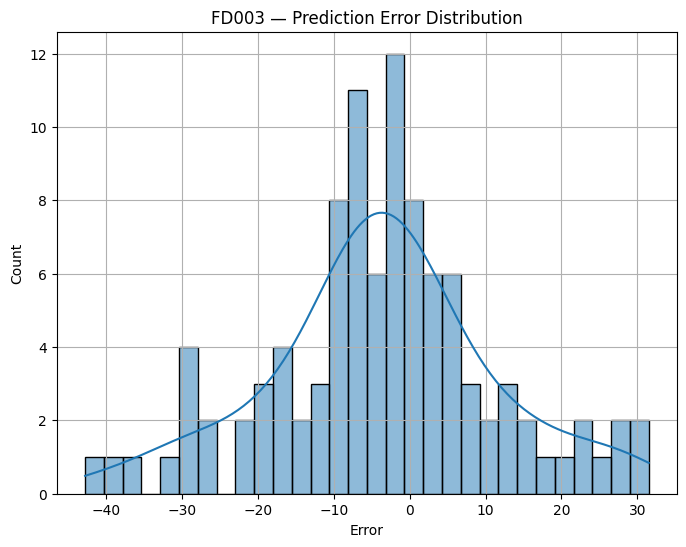

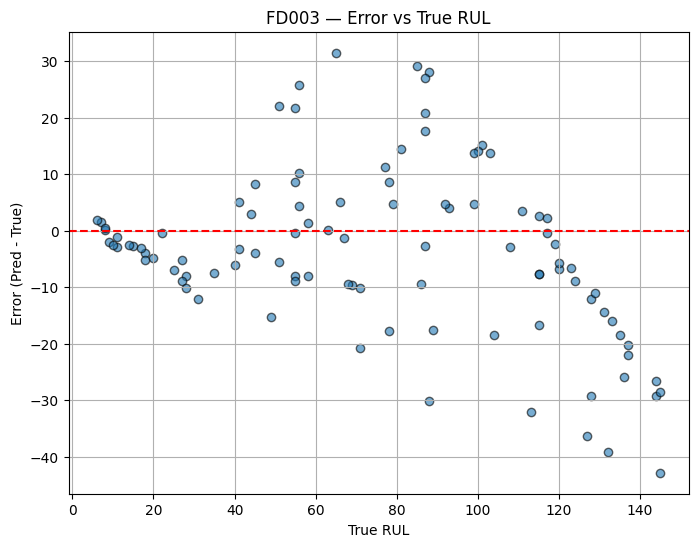


 TOP 10 WORST FD003 ENGINES 


,unit,True_RUL,Pred_RUL,Error,Abs_Error
82,83,145,102.189461,-42.810539,42.810539
17,18,132,92.808311,-39.191689,39.191689
94,95,127,90.684090,-36.315910,36.315910
95,96,113,80.963203,-32.036797,32.036797
33,34,65,96.514244,31.514244,31.514244
56,57,88,57.817158,-30.182842,30.182842
59,60,128,98.713257,-29.286743,29.286743
27,28,144,114.735397,-29.264603,29.264603
18,19,85,114.233231,29.233231,29.233231
36,37,145,116.459236,-28.540764,28.540764


[INFO] FD003 error analysis complete.


In [31]:
# 31. FD003 TEST PLOTS & ERROR ANALYSIS


log(" FD003 TEST — VISUALIZATION & ERROR ANALYSIS ")

true_rul_fd003 = y_test_last_true_fd003
pred_rul_fd003 = y_test_pred_fd003_calibrated
errors_fd003   = pred_rul_fd003 - true_rul_fd003

plt.figure(figsize=(8,6))
plt.scatter(true_rul_fd003, pred_rul_fd003, alpha=0.7, edgecolor="k")
plt.plot([0, max(true_rul_fd003)], [0, max(true_rul_fd003)], "r--")
plt.xlabel("True RUL")
plt.ylabel("Predicted RUL")
plt.title("FD003 — True vs Predicted (Calibrated)")
plt.grid(True)
plt.show()

plt.figure(figsize=(8,6))
sns.histplot(errors_fd003, bins=30, kde=True)
plt.title("FD003 — Prediction Error Distribution")
plt.xlabel("Error")
plt.grid(True)
plt.show()

plt.figure(figsize=(8,6))
plt.scatter(true_rul_fd003, errors_fd003, alpha=0.6, edgecolor="k")
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("True RUL")
plt.ylabel("Error (Pred - True)")
plt.title("FD003 — Error vs True RUL")
plt.grid(True)
plt.show()

df_errors_fd003 = pd.DataFrame({
    "unit": np.arange(1, len(true_rul_fd003)+1),
    "True_RUL": true_rul_fd003,
    "Pred_RUL": pred_rul_fd003,
    "Error": errors_fd003,
    "Abs_Error": np.abs(errors_fd003)
})

df_errors_sorted_fd003 = df_errors_fd003.sort_values("Abs_Error", ascending=False)

print("\n TOP 10 WORST FD003 ENGINES ")
display(df_errors_sorted_fd003.head(10))

log("FD003 error analysis complete.")

# **32. FD003 NASA Asymmetric Score (Final Test Evaluation)**

This cell computes the final NASA asymmetric score for the calibrated FD003 test predictions, providing the benchmark metric used in CMAPSS-based RUL research.
Both total and mean NASA scores are calculated to quantify the model’s penalty-weighted accuracy, where overestimation and underestimation carry different risks.
The score is saved to a text file for documentation and comparison with other datasets and model variants, completing the formal evaluation of the FD003 model.

In [32]:
# 32. FD003 NASA SCORE


log(" FD003 NASA Asymmetric Score (TEST) ")

total_nasa_fd003, mean_nasa_fd003 = nasa_asymmetric_score(
    y_test_last_true_fd003,
    y_test_pred_fd003_calibrated
)

print(f"\nFD003 NASA SCORE (TEST CALIBRATED): {total_nasa_fd003:.4f}")
print(f"Mean NASA score (FD003): {mean_nasa_fd003:.4f}")

save_path_fd003_nasa = os.path.join(BASE_PATH_FD003, "FD003_NASA_SCORE.txt")
with open(save_path_fd003_nasa, "w") as f:
    f.write(f"FD003 NASA Score (Calibrated): {total_nasa_fd003:.4f}\n")
    f.write(f"Mean NASA: {mean_nasa_fd003:.4f}\n")

print(f"Saved FD003 NASA score to:\n{save_path_fd003_nasa}")

[INFO]  FD003 NASA Asymmetric Score (TEST) 

FD003 NASA SCORE (TEST CALIBRATED): 317.9155
Mean NASA score (FD003): 3.1792
Saved FD003 NASA score to:
/content/drive/MyDrive/OIL PREDICTIVE MAINTAINANCE/CMaps/FD003_NASA_SCORE.txt


# **33. Save FD003 Test Results and Final Summary**

This final step saves the complete FD003 test prediction table—including true RUL, raw predictions, and calibrated predictions—to a CSV file for reporting and downstream analysis.
A concise summary of the best-performing model, validation metrics, calibrated NASA score, and applied calibration parameters is printed to document the final evaluation outcomes.
This summary serves as the concluding checkpoint for the FD003 modeling pipeline, ensuring all key results are stored and clearly communicated.

In [33]:
# 33. SAVE FD003 TEST RESULTS + SUMMARY


results_path_fd003 = os.path.join(BASE_PATH_FD003, "FD003_TEST_RESULTS.csv")
df_fd003_test_out.to_csv(results_path_fd003, index=False)
log(f"FD003 test results saved to: {results_path_fd003}")

print("\n FD003 SUMMARY ")
print(f"Best Model Used        : {best_model_name_fd003}")
print(f"Validation RMSE        : {df_fd003_leaderboard.loc[best_model_name_fd003, 'RMSE_val']:.4f}")
print(f"Validation MAE         : {df_fd003_leaderboard.loc[best_model_name_fd003, 'MAE_val']:.4f}")
print(f"Mean NASA (test)       : {mean_nasa_fd003:.4f}")
print(f"Shift Used             : {BEST_NASA_SHIFT_FD003}")
print(f"Max RUL Cap Used       : {MAX_RUL_NASA_FD003}")

log("FD003 summary complete.")

[INFO] FD003 test results saved to: /content/drive/MyDrive/OIL PREDICTIVE MAINTAINANCE/CMaps/FD003_TEST_RESULTS.csv

 FD003 SUMMARY 
Best Model Used        : GRU_TUNED
Validation RMSE        : 12.6911
Validation MAE         : 9.3230
Mean NASA (test)       : 3.1792
Shift Used             : 2.0
Max RUL Cap Used       : 125.0
[INFO] FD003 summary complete.


# **34. SAVE FD003 MODEL CONFIGURATION**

This cell generates and saves the full configuration dictionary required to reproduce or deploy the best-performing FD003 model.
The configuration file includes paths to the trained model and scalers, the final feature set used during training, the chosen sequence length, and the optimal NASA calibration parameters.
Storing this metadata in a structured JSON format ensures consistent inference behavior, enables seamless integration into a unified pipeline, and supports deployment workflows such as FastAPI model serving.

In [34]:
# 34. SAVE FD003 MODEL CONFIGURATION


import json

log("Saving FD003 configuration...")

fd003_config = {
    "best_model_name": best_model_name_fd003,
    "model_path": f"{models_dir_fd003}/FD003_{best_model_name_fd003}_BEST.keras",
    "feature_scaler_path": scaler_fd003_path,
    "rul_scaler_path": rul_scaler_fd003_path,
    "feature_columns": feature_cols_fd003,
    "final_feature_columns": feature_cols_final_fd003,
    "sequence_length": SEQ_LEN_FD003,
    "nasa_shift": BEST_NASA_SHIFT_FD003,
    "nasa_max_rul_cap": MAX_RUL_NASA_FD003
}

config_path_fd003 = os.path.join(models_dir_fd003, "FD003_config.json")

with open(config_path_fd003, "w") as f:
    json.dump(fd003_config, f, indent=4)

print(f" FD003 config saved to:\n{config_path_fd003}")

log("FD003 configuration save complete.")


[INFO] Saving FD003 configuration...
 FD003 config saved to:
/content/drive/MyDrive/OIL PREDICTIVE MAINTAINANCE/CMaps/models_fd003/FD003_config.json
[INFO] FD003 configuration save complete.
